<a href="https://colab.research.google.com/github/tnqkrghd/NLP/blob/main/03_%EC%96%B8%EC%96%B4_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3. 언어 모델**

### **3.1 언어 모델(LM)이란?**

* 언어 모델(Language Model, LM)은 언어라는 현상을 모델링하고자 단어 시퀀스(또는 문장)에 확률을 할당(assign)하는 모델입니다.

* 단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 하는 것입니다.

* 언어 모델을 만드는 방법은 크게는 통계를 이용한 방법과 인공 신경망을 이용한 방법으로 구분할 수 있습니다.

* 언어 모델에 -ing를 붙인 언어 모델링(Language Modeling)은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말합니다.

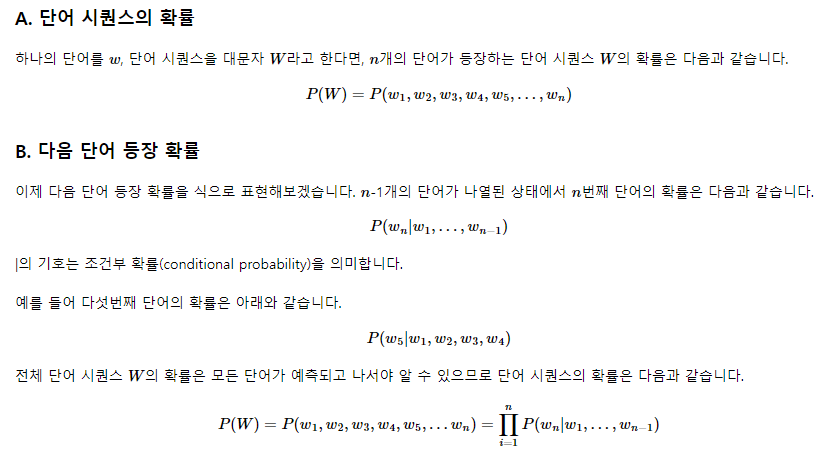

### **3.2 통계적 언어 모델(SLM)**

* 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성됩니다.

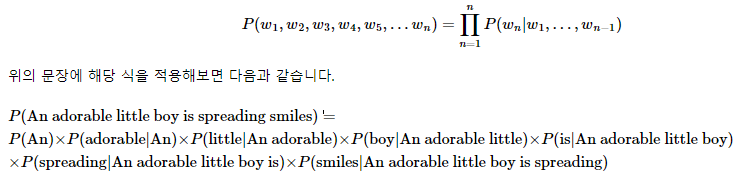

* SLM은 이전 단어로부터 다음 단어에 대한 확률을 카운트에 기반하여 계산합니다.

* 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표입니다. 그런데 카운트 기반으로 접근하려고 한다면 갖고있는 코퍼스(corpus). 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이 필요합니다.

* 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 희소 문제(sparsity problem)라고 합니다. 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다.

### **3.3 N-gram 언어 모델**

* 앞서 배운 언어 모델과는 달리 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다. 그리고 이때 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.

  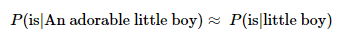

* 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.  

* 이 때 임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram입니다. n-gram은 n개의 연속적인 단어 나열을 의미합니다. 

* 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다. 예를 들어서 문장 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같습니다.

  - unigrams : an, adorable, little, boy, is, spreading, smiles
  - bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
  - trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
  - 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

* n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. 예를 들어 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려합니다.

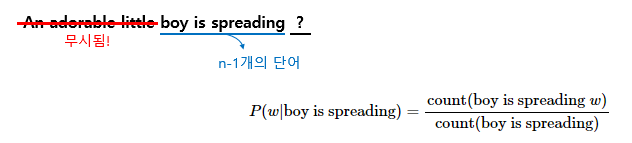

< N-gram LM의 한계 >

* 희소 문제
  - n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재합니다.


* trade-off 문제
  - n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해집니다. 또한 n이 커질수록 모델 사이즈가 커진다는 문제점도 있습니다.
  - n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다. 그렇기 때문에 적절한 n을 선택해야 합니다. 
  - trade-off 문제로 인해 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다.

### **3.4 한국어에서의 언어 모델**

* 한국어는 어순이 중요하지 않다.
  - 이로 인해 확률에 기반한 언어 모델이 제대로 다음 단어를 예측하기가 어려움

* 한국어는 교착어이다.
  - 영어와 달리 한국어는 조사가 있기에 토큰화를 통해 접사나 조사를 분리하는 과정이 중요함

* 한국어는 띄어쓰기가 제대로 지켜지지 않는다.
  - 이로 인해 토큰이 제대로 분리 되지 않은 채 훈련이 진행될 경우 모델이 정상 작동하지 않음

### **3.5 펄플렉서티(Perplexity)**

* 펄플렉서티(perplexity, 이하 PPL)는 언어 모델을 평가하기 위한 내부 평가 지표로, 

  조금은 부정확할 수는 있어도 테스트 데이터에 대해서 빠르게 식으로 계산되는 더 간단한 평가 방법이다.

* PPL은 단어의 수로 정규화(normalization) 된 테스트 데이터에 대한 확률의 역수로, 낮을수록 성능이 좋음을 의미한다.

  즉, PPL을 최소화한다는 것은 문장의 확률을 최대화하는 것과 같다.



  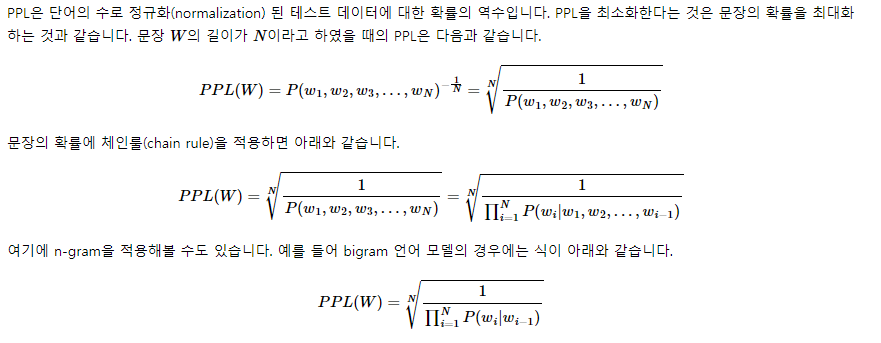

< 분기 계수 >

* PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수(branching factor)로, 

  이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지를 의미한다.

* 같은 테스트 데이터에 대해서 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 

  두 언어 모델 중 어떤 것이 성능이 좋은지도 판단이 가능하다다. 당연히 PPL이 더 낮은 언어 모델의 성능이 더 좋다고 볼 수 있다.

* 단, 평가 방법에 있어서 주의할 점은 PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것이지, 사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다는 점입니다.
